A heart attack occurs when the flow of blood to the heart is blocked. The blockage is most often a buildup of fat, cholesterol and other substances, which form a plaque in the arteries that feed the heart (coronary arteries).

Sometimes, a plaque can rupture and form a clot that blocks blood flow. The interrupted blood flow can damage or destroy part of the heart muscle.

A heart attack, also called a myocardial infarction, can be fatal, but treatment has improved dramatically over the years. It's crucial to call 911 or emergency medical help if you think you might be having a heart attack.

In [96]:
#@title
from IPython.display import Image
Image(url='http://25.media.tumblr.com/ca457fb1dc837412a04f9bbd4c97fa81/tumblr_mwksvePcte1rdj8nco2_r1_250.gif')

# <font color='blue'>Importing the libraries</font>




In [97]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as ss

plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<iframe src="https://www.kaggle.com/embed/creepycrap/heart-attack-pred?cellIds=15&kernelSessionId=65831008" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Heart Attack 🧡Pred....🤕"></iframe>

In [98]:

data_heart=pd.read_csv("/content/heart.csv")
data_o2saturation=pd.read_csv("/content/o2Saturation.csv")

# <font color='blue'> The heart dataset </font>

In [99]:
#@title
data_heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# <font color='blue'> The O2 saturation dataset </font>

In [100]:
#@title
data_o2saturation

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


# <font color='blue'> Formatting the column names </font>

In [101]:
#@title

data_o2saturation.columns=["o2_saturation"]
df=data_heart.merge(data_o2saturation,left_index=True,right_index=True)
new_columns=['age','sex','chest pain','resting blood pressure','serum cholesterol in mg/L','fasting blood sugar','resting electrocardiographic result','maximum heart rate achieved','Exercice induced angina','ST depression induced by exercice relative to rest','The slope of the peak exercice ST exercice',' Number of major vessels','thal','Presence of heart disease','o2_saturation']
print(len(new_columns))
df.columns=new_columns

15


In [102]:
df.describe()


,age,sex,chest pain,resting blood pressure,serum cholesterol in mg/L,fasting blood sugar,resting electrocardiographic result,maximum heart rate achieved,Exercice induced angina,ST depression induced by exercice relative to rest,The slope of the peak exercice ST exercice,Number of major vessels,thal,Presence of heart disease,o2_saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000



# <font color='blue'> Distribution of heart disease presence/absence


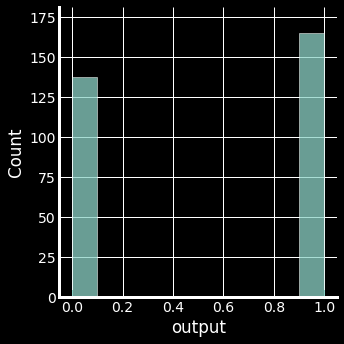

In [103]:
#@title

sns.displot(data_heart.output, kde=False, rug=True)
plt.show()

# <font color='blue'> Cheking for null values in the data set

In [104]:
#@title

df.isnull().sum()

age                                                   0
sex                                                   0
chest pain                                            0
resting blood pressure                                0
serum cholesterol in mg/L                             0
fasting blood sugar                                   0
resting electrocardiographic result                   0
maximum heart rate achieved                           0
Exercice induced angina                               0
ST depression induced by exercice relative to rest    0
The slope of the peak exercice ST exercice            0
 Number of major vessels                              0
thal                                                  0
Presence of heart disease                             0
o2_saturation                                         0
dtype: int64

# <font color='blue'> Check if some rows are duplicated



In [105]:
df['chest pain'].unique()
df['thal'].unique()

array([1, 2, 3, 0])

In [106]:
df[df.duplicated()]
df=df.drop_duplicates()

In [107]:
df[df.duplicated()]


,age,sex,chest pain,resting blood pressure,serum cholesterol in mg/L,fasting blood sugar,resting electrocardiographic result,maximum heart rate achieved,Exercice induced angina,ST depression induced by exercice relative to rest,The slope of the peak exercice ST exercice,Number of major vessels,thal,Presence of heart disease,o2_saturation


# <font color='blue'> Categorical variables


In [108]:
#@title

col_num=['age','resting blood pressure','serum cholesterol in mg/L','maximum heart rate achieved','ST depression induced by exercice relative to rest','o2_saturation']
col_cat=list(set(df.columns)-set(col_num))
col_cat

['The slope of the peak exercice ST exercice',
 'fasting blood sugar',
 ' Number of major vessels',
 'thal',
 'chest pain',
 'Presence of heart disease',
 'resting electrocardiographic result',
 'Exercice induced angina',
 'sex']

# <font color='blue'> Distribution by classe


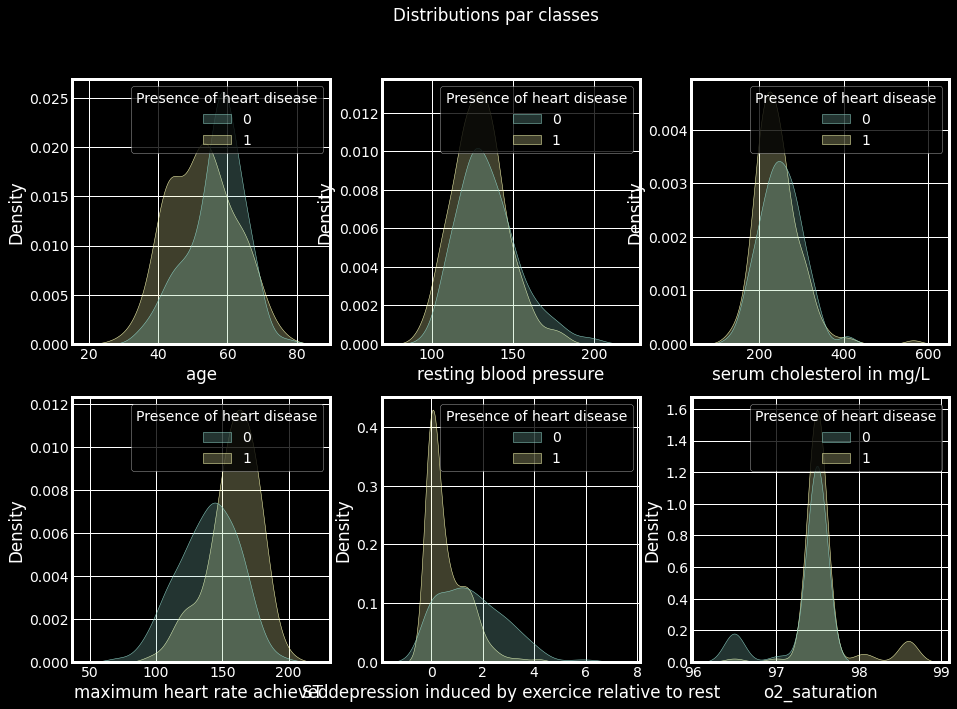

In [109]:
#@title

fig, axes = plt.subplots(2, 3, figsize=(14, 10))

fig.suptitle('Distributions par classes')
c=0
for i in range(2):
  for j in range(3):
    col = col_num[c]
    if col != 'output':
      sns.kdeplot(data=df,x=col,hue='Presence of heart disease',ax=axes[i, j],fill=True)
    c +=1
    if c==15:
      break
plt.show()

# <font color='blue'> Visualizing continuous data

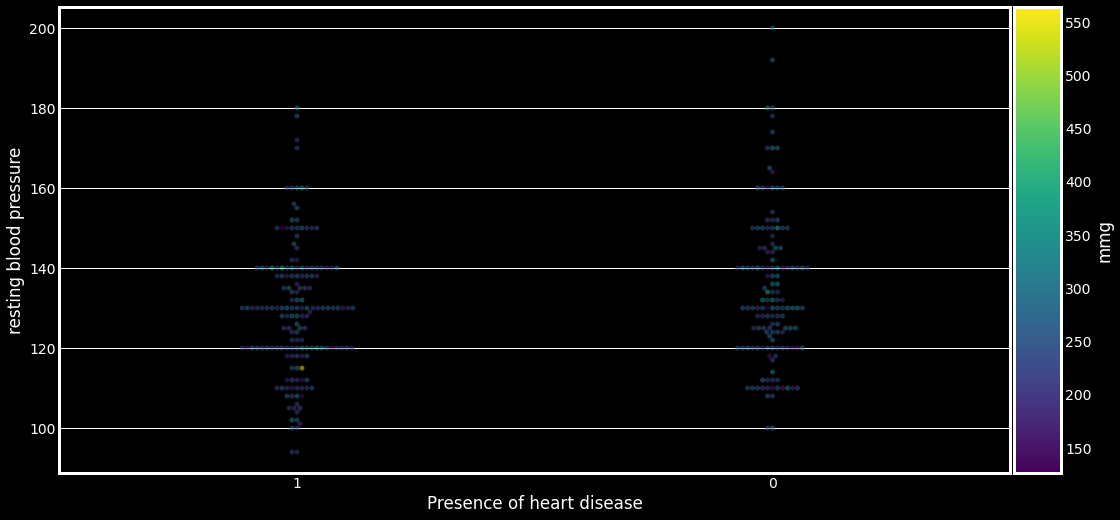

In [110]:
#@title

import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

df_tension = (df.groupby("Presence of heart disease", as_index=False)["resting blood pressure"]
                      .mean()
                      .sort_values(by="resting blood pressure"))


fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()
#df = df.sample(frac=0.9)
# code adapted from https://stackoverflow.com/questions/40814612/map-data-points-to-colormap-with-seaborn-swarmplot
#Create a matplotlib colormap from the sns viridis color palette
cmap = plt.get_cmap("viridis")
# Normalize to the range of possible values from df["c"]
norm = matplotlib.colors.Normalize(vmin=df["serum cholesterol in mg/L"].min(), vmax=df["serum cholesterol in mg/L"].max())
# create a color dictionary (value in c : color from colormap) 
colors = {}
for cval in df["serum cholesterol in mg/L"].values:
    colors.update({cval : cmap(norm(cval))})

# swarmplot is longer to plot because it plots all points individually. Sampling may help. Data missing for the 15th is an issue then.
chart = sns.swarmplot(data=df, x="Presence of heart disease", y="resting blood pressure", 
                      hue="serum cholesterol in mg/L", palette=colors, ax=ax, order=df_tension["Presence of heart disease"],
                      alpha=0.5); # transparency
plt.gca().legend_.remove()

## create colorbar ##
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
fig.add_axes(ax_cb)
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('mmg')

# <font color='blue'> Visualizing categorical *data*

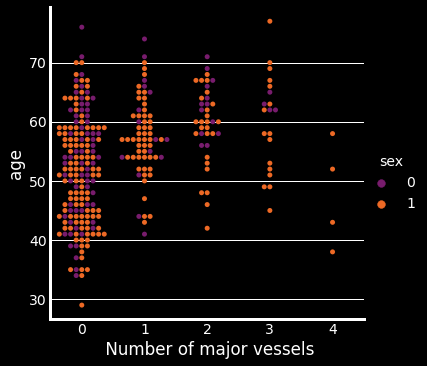

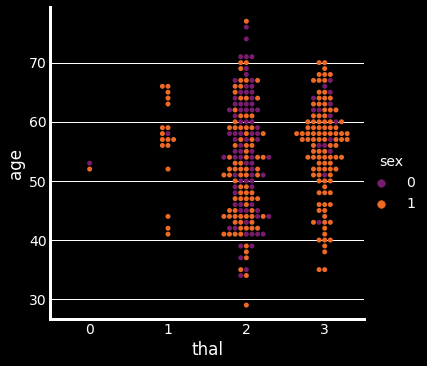

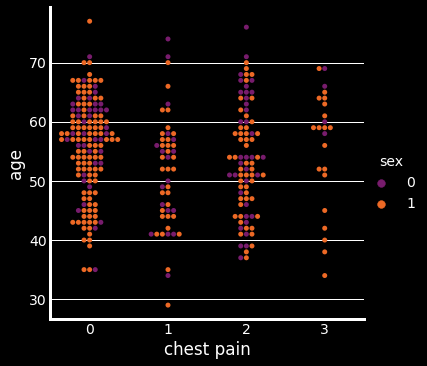

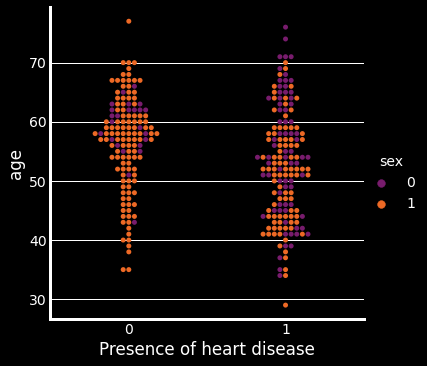

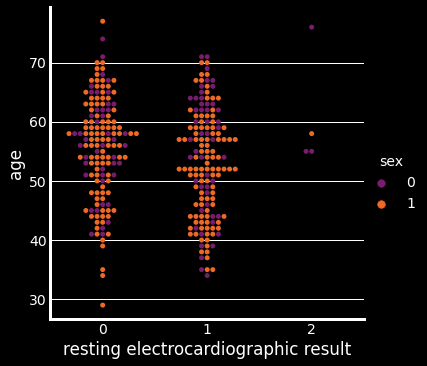

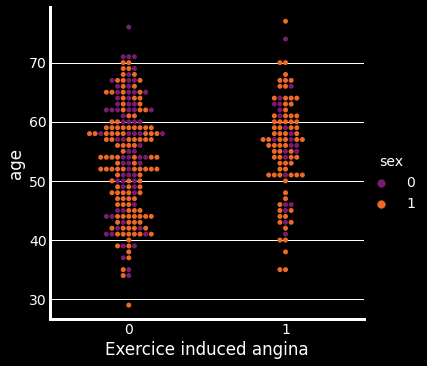

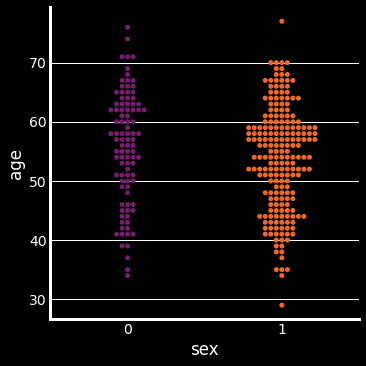

In [111]:
#@title

#Pie plots 
for col in col_cat[2:]:
    ax=px.pie(df, names= col ,template= "plotly_dark",title=col,hole=0.7)
    ax.show()
    
#Swarm Plots
for col in col_cat[2:]:
    sns.catplot(kind="swarm", data=df, x=col, y="age", palette="inferno", hue="sex")
plt.show()

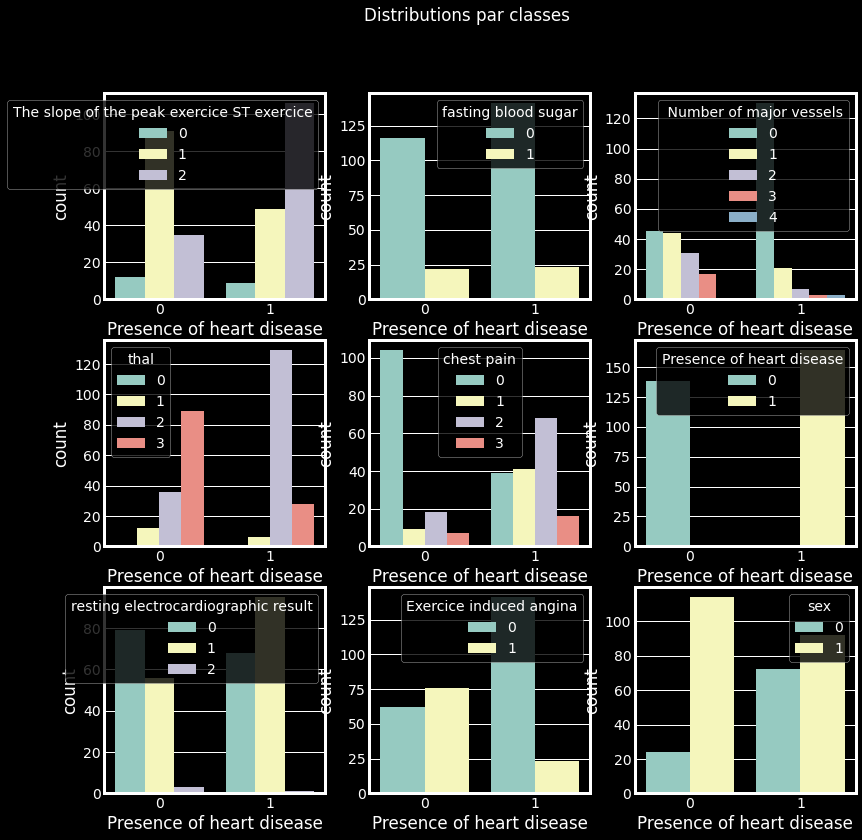

In [112]:
#@title

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

fig.suptitle('Distributions par classes')
c=0
for i in range(3):
  for j in range(3):
    col = col_cat[c]
    sns.countplot(data=df,x='Presence of heart disease',hue=col,ax=axes[i, j])
    c +=1
   
plt.show()

# <font color='blue'> Multivariate analysis

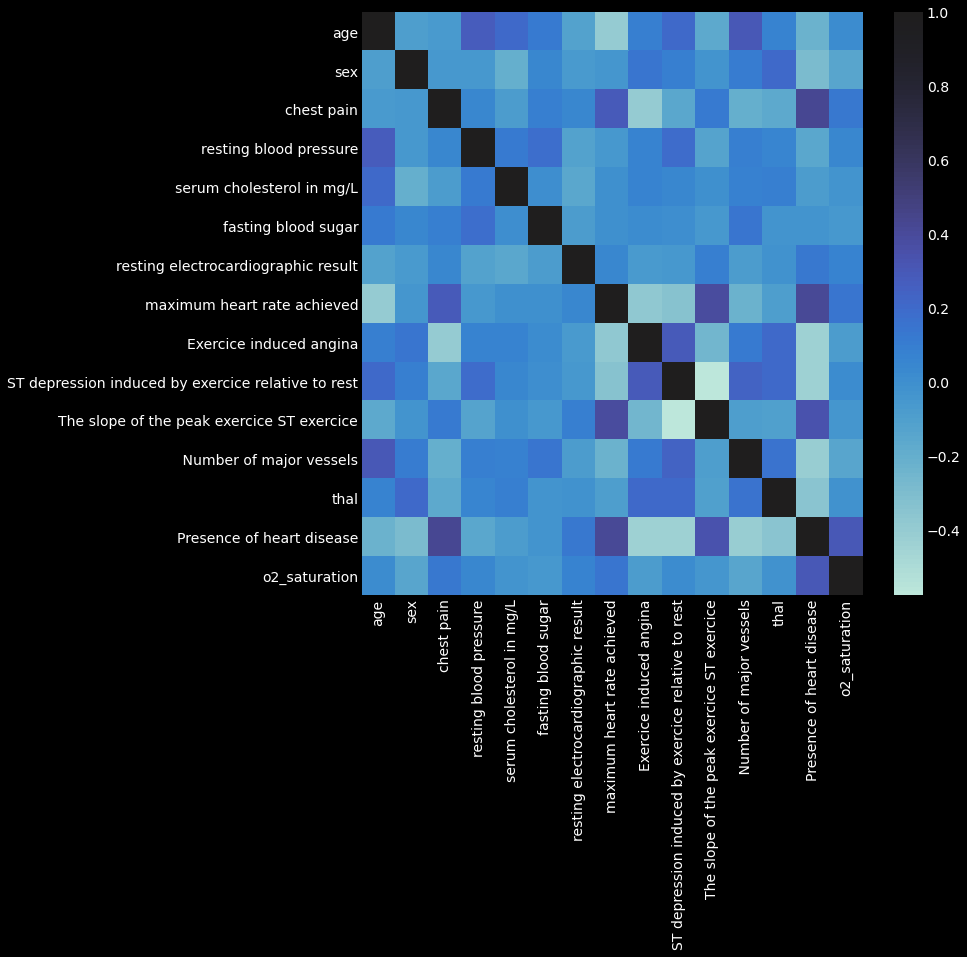

In [113]:
#@title

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),center=True)

# <font color='blue'> Normalization of data

In [114]:

X=df.drop(columns=['Presence of heart disease'])
X_norm=(X-X.mean())/X.std()
y=df['Presence of heart disease']

# <font color='blue'> Apply PCA on the data

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



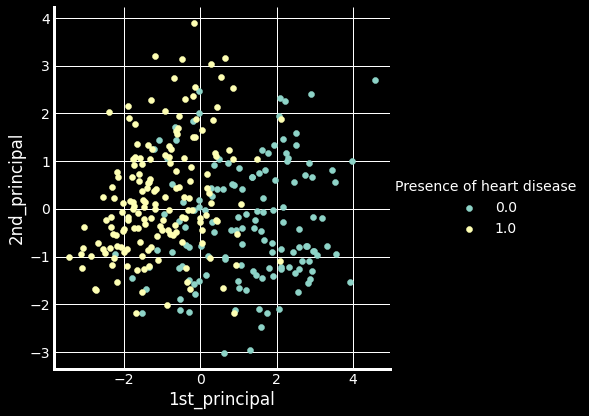

In [115]:
#@title

from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
reduced_df=pca.fit_transform(X_norm)
pca_data = np.vstack((reduced_df[:,0:2].T, df['Presence of heart disease'])).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","Presence of heart disease"))
#sns.scatterplot( x=reduced_df[:,0], y=reduced_df[:,1],c=df['Presence of heart disease'])
sns.FacetGrid(pca_df, hue="Presence of heart disease", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [116]:
reduced_df.shape

(302, 13)

# <font color='blue'> Variance as a function of the number of components

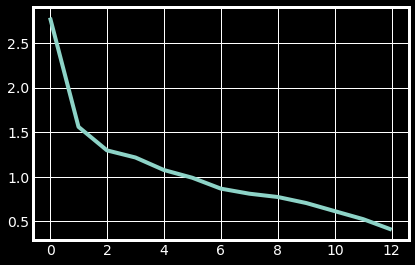

In [117]:
#@title

plt.plot(pca.explained_variance_)

# <font color='blue'> Applying the spectral embedding on the data

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



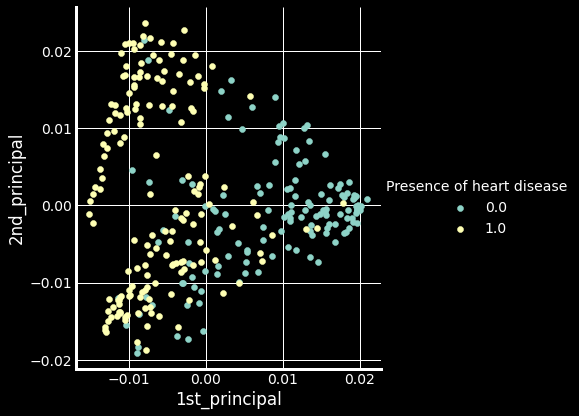

In [118]:
#@title

from sklearn.manifold import SpectralEmbedding
se=SpectralEmbedding(n_jobs=-1,n_components=4)
se_df=se.fit_transform(X_norm)
se_data = np.vstack((se_df[:,0:2].T, df['Presence of heart disease'])).T


# creating a new data fram which help us in ploting the result data
se_df = pd.DataFrame(data=se_data, columns=("1st_principal", "2nd_principal","Presence of heart disease"))
sns.FacetGrid(se_df, hue="Presence of heart disease", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# <font color='blue'> Applying T-SNE on the *data*


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



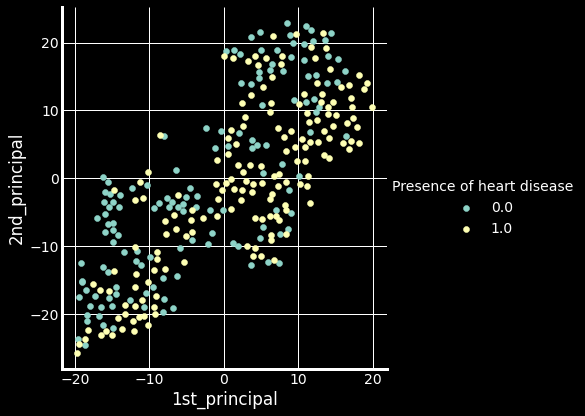

In [119]:
#@title

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=42, perplexity=30)
tsne_df = tsne.fit_transform(X) 
tsne_data = np.vstack((tsne_df[:,0:2].T, df['Presence of heart disease'])).T


# creating a new data fram which help us in ploting the result data
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st_principal", "2nd_principal","Presence of heart disease"))
sns.FacetGrid(tsne_df, hue="Presence of heart disease", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# <font color='blue'> Applying uMap on the *data*

In [120]:
!pip install umap-learn

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



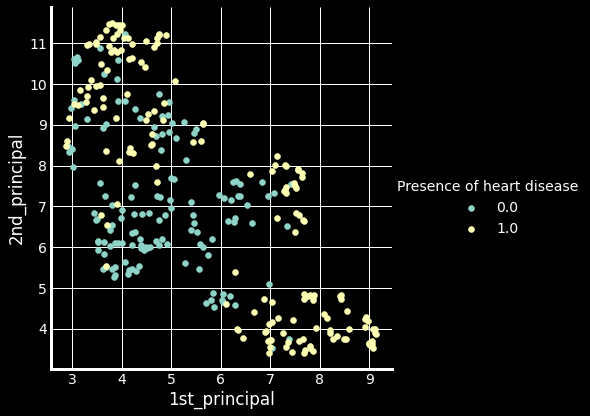

In [121]:
#@title

import umap
u_df=umap.UMAP().fit_transform(X_norm)
u_data = np.vstack((u_df[:,0:2].T, df['Presence of heart disease'])).T
# creating a new data fram which help us in ploting the result data
u_df = pd.DataFrame(data=u_data, columns=("1st_principal", "2nd_principal", "Presence of heart disease"))
sns.FacetGrid(u_df, hue="Presence of heart disease", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# <font color='blue'> Using xgboost classifer

In [122]:
#@title

y=df['Presence of heart disease']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=20)
from sklearn.metrics import accuracy_score

In [123]:
#@title

from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=35)
xgb.fit(xtrain,ytrain)
y_pred=xgb.predict(xtest)
print('test accuracy:',round(accuracy_score(ytest,y_pred),2))

test accuracy: 0.84


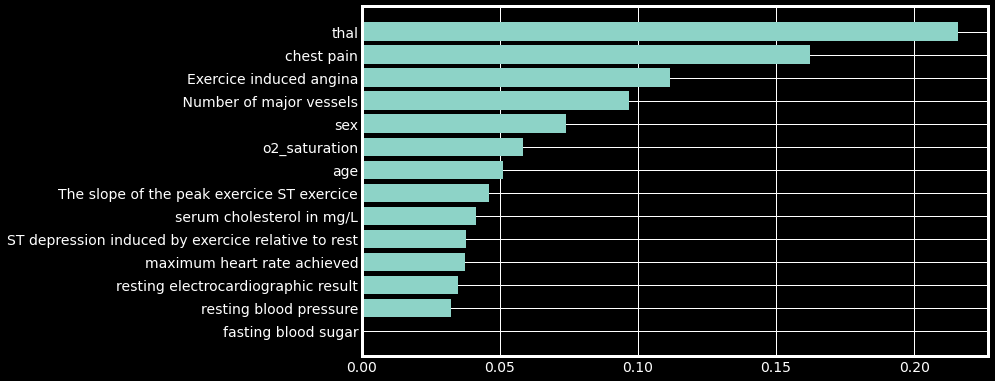

In [124]:
#@title

dic={'colonne':X.columns,
    'importance':xgb.feature_importances_
}
d=pd.DataFrame(dic).sort_values(by='importance')
plt.figure(figsize=(10,6))
plt.barh(d['colonne'],d['importance'])
plt.show()

# <font color='blue'> Using RandomFores classifer

In [125]:
#@title

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1,random_state=15)
rf.fit(xtrain,ytrain)
y_pred=rf.predict(xtest)
print('test accuracy:',round(accuracy_score(ytest,y_pred),2))

test accuracy: 0.92


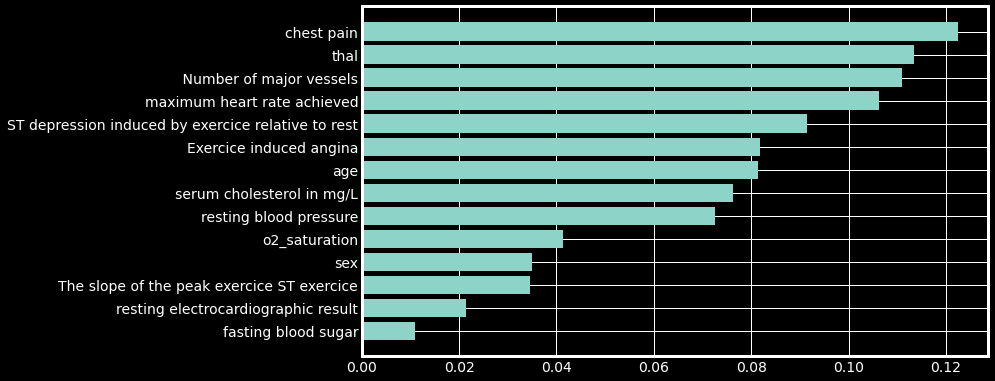

In [126]:
#@title

dic={'colonne':X.columns,
    'importance':rf.feature_importances_
}
d=pd.DataFrame(dic).sort_values(by='importance')
plt.figure(figsize=(10,6))
plt.barh(d['colonne'],d['importance'])
plt.show()